problem statement : Given the dataset of persons. We need to preedict wheather the person has an affair or not

## Importing Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler , PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix , classification_report , roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as  sm
import pickle

## EDA 

In [5]:
df = sm.datasets.fair.load_pandas().data

In [8]:
affair = []
for i in df["affairs"]:
    if(i == 0):
        affair.append(0)
    else:
        affair.append(1)

In [9]:
df["affair"] = affair
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [11]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


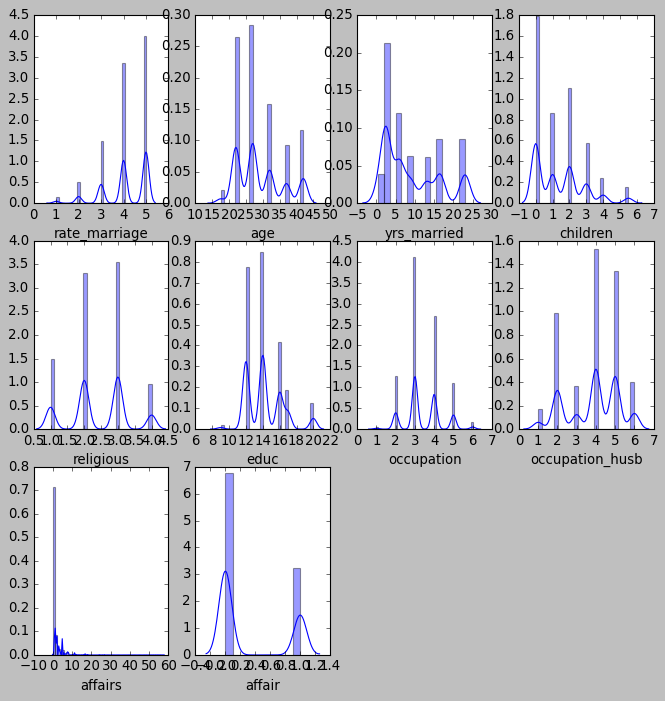

In [14]:
plt.style.use("classic")
fig = plt.figure(figsize=(10,10))
for i in range(len(df.columns)):
    plt.subplot(3,4,i+1)
    sns.distplot(df.iloc[:,i])

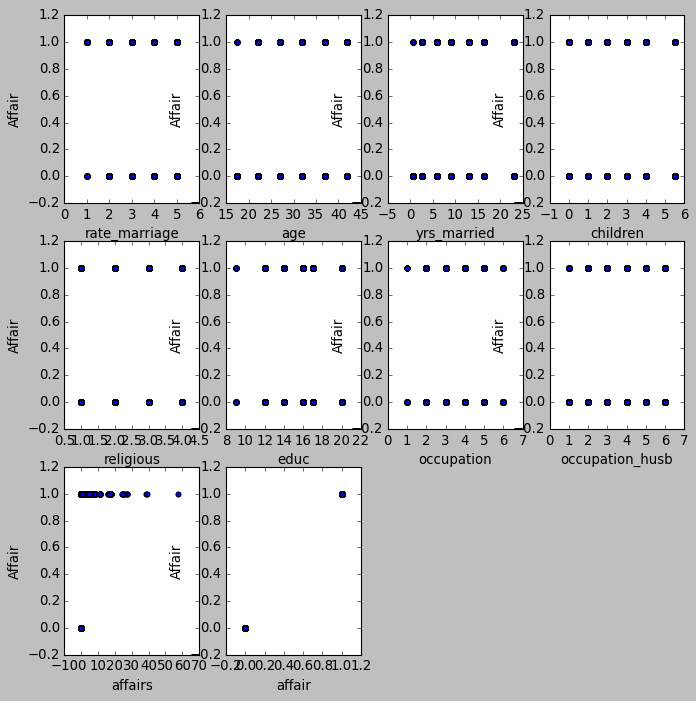

In [15]:
plt.style.use("classic")
fig = plt.figure(figsize=(10,10))
for i in range(len(df.columns)):
    plt.subplot(3,4,i+1)
    plt.scatter(df.iloc[:,i], df["affair"])
    plt.xlabel(df.columns[i])
    plt.ylabel("Affair")

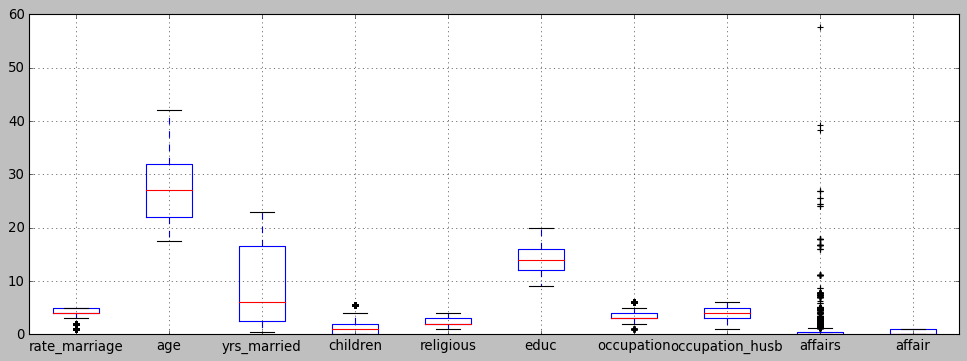

In [17]:
plt.figure(figsize=(15,5))
df.boxplot()

In [36]:
sc = StandardScaler()
x_scaled = sc.fit_transform(df.drop(["affair"], axis = 1))

In [37]:
X = df.drop(["affair"], axis = 1)
y = df[["affair"]]
X[X.columns] = x_scaled
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,-1.154252,0.426025,-0.001295,1.118441,0.653341,1.281153,-1.511292,0.854069,-0.269727
1,-1.154252,-0.304185,0.548190,1.118441,-1.623785,-0.096364,-0.450087,0.111309,1.146239
2,-0.114053,-1.034396,-0.894207,-0.974546,-1.623785,0.821981,-0.450087,0.854069,0.315280
3,-0.114053,1.156235,1.028989,1.816103,0.653341,0.821981,1.672324,0.854069,0.009940
4,0.926147,-0.304185,-0.001295,-0.276884,-1.623785,-0.096364,-0.450087,0.111309,1.797972


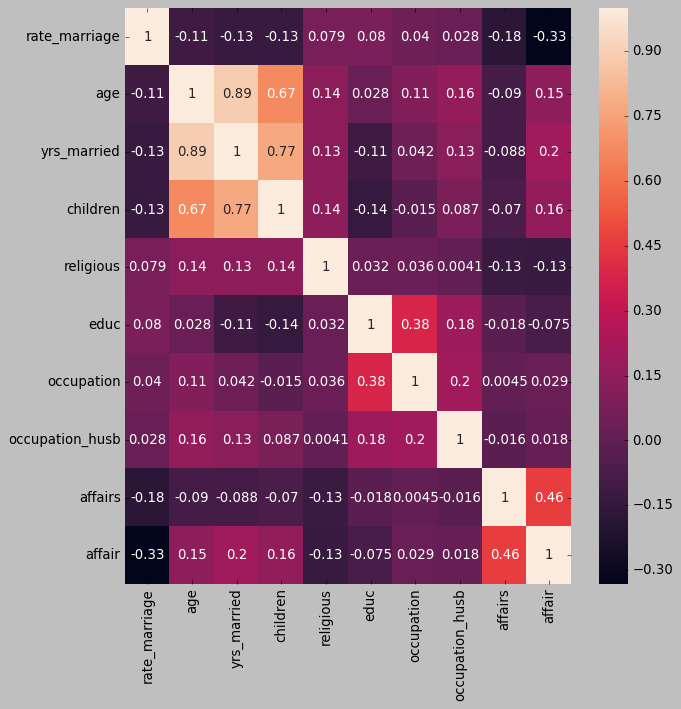

In [81]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True)

In [43]:
vif = []
for i in range(len(df.columns)):
    vif.append(variance_inflation_factor(np.array(df), i ))
VIF = pd.DataFrame({"Features":df.columns, "VIF":vif})
VIF

,Features,VIF
0,rate_marriage,17.681187
1,age,75.239012
2,yrs_married,15.594507
3,children,4.892293
4,religious,8.747782
5,educ,47.981867
6,occupation,17.173203
7,occupation_husb,9.858682
8,affairs,1.472582
9,affair,2.114221


In [50]:
X["Derived_feature"] = X[VIF["Features"][VIF["VIF"] > 5]].mean(axis = 1)
X.drop(VIF["Features"][VIF["VIF"] > 5], axis = 1, inplace = True)

In [51]:
X.head()

,children,affairs,Derived_feature
0,1.118441,-0.269727,0.078250
1,1.118441,1.146239,-0.424168
2,-0.974546,0.315280,-0.348640
3,1.816103,0.009940,0.867555
4,-0.276884,1.797972,-0.205466


In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y , random_state = 101, test_size = 0.25)

## Selecting Model

In [54]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.960427135678392

## Fining and Tuning

In [58]:
deg = [1,2,3,4]
for i in deg:
    poly = PolynomialFeatures(degree= i)
    x_poly = poly.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y , random_state = 101, test_size = 0.25)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    print(lr.score(x_test, y_test))

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

0.960427135678392
0.9522613065326633
0.9704773869346733
0.9698492462311558


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
poly = PolynomialFeatures(degree= 3)
x_poly = poly.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y , random_state = 101, test_size = 0.25)
lr = LogisticRegression()
lr.fit(x_train, y_train)
print(lr.score(x_test, y_test))

0.9704773869346733


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Testing results visualization

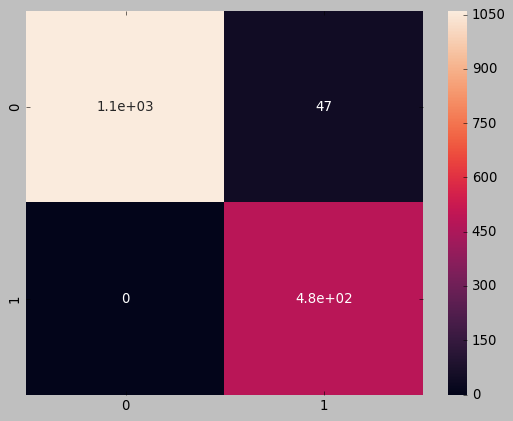

In [67]:
cm = confusion_matrix((lr.predict(x_test)), y_test)
sns.heatmap(cm, annot= True)

In [68]:
print(classification_report(lr.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1108
           1       0.91      1.00      0.95       484

    accuracy                           0.97      1592
   macro avg       0.96      0.98      0.97      1592
weighted avg       0.97      0.97      0.97      1592



In [69]:
roc_auc_score(lr.predict(x_test), y_test)

0.9787906137184115

In [70]:
fpr, tpr , threshold = roc_curve(lr.predict(x_test), y_test)

Text(0, 0.5, 'True Positive Rate')

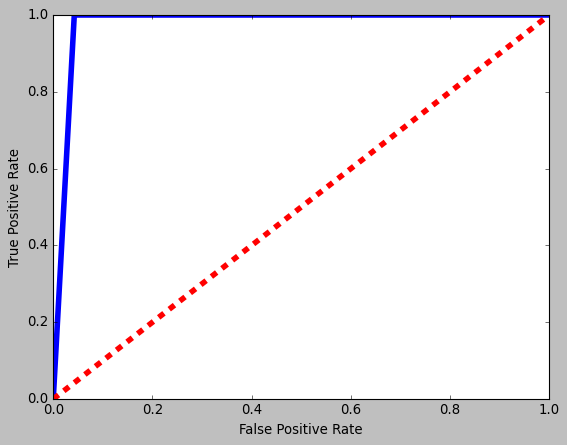

In [78]:
plt.plot(fpr, tpr, color = "blue", linewidth = 5)
plt.plot([0,1], linestyle = "--", color = "red", linewidth = 5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## Saving Models and files for deployment

In [83]:
pickle.dump(lr, open("Desktop/Affair prediction/model.pickle",  "wb"))
pickle.dump(sc, open("Desktop/Affair prediction/scaler.pickle", "wb"))
pickle.dump(poly, open("Desktop/Affair prediction/poly.pickle", "wb"))